# Load library and data

In [1]:
from __future__ import unicode_literals
import pandas as pd
from pprint import pprint
from googletrans import Translator
from collections import Counter
import matplotlib.pyplot as plt

def jpn2eng(jpn_text):
    return Translator().translate(jpn_text).text
    
#Load data
df = pd.read_csv('data.csv')

# Type of interviewee groups including Summer/Autum interns and full-time ones. 
df_interviewee_groups = df.groupby(['いつの選考ですか'])
interviewee_groups = df_interviewee_groups.groups
group_names = interviewee_groups.keys()
print("Interviewee groups:\n")
[print("{} --> {}".format(name, jpn2eng(name))) for name in group_names]

Interviewee groups:

秋・冬のインターン --> Autumn / Winter Intern
夏のインターン --> Summer intern
本選考 --> This selection


[None, None, None]

# 1. Analyze the ES Selection Result

## 1.1 ES Selection Result


秋・冬のインターン(Autumn / Winter Intern):
Most Result are: はい --> Yes

夏のインターン(Summer intern):
Most Result are: はい --> Yes

本選考(This selection):
Most Result are: はい --> Yes



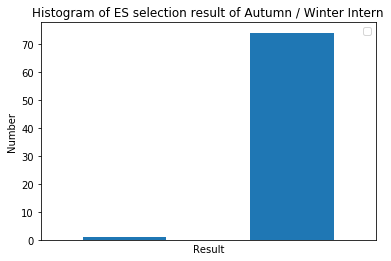

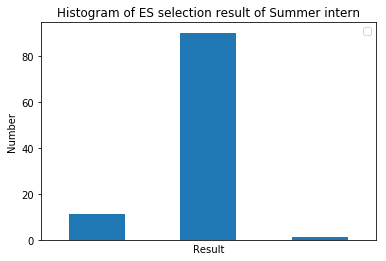

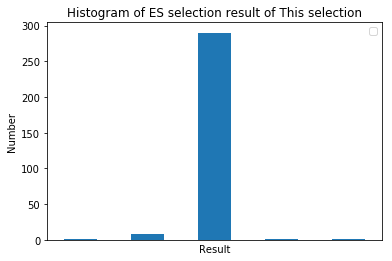

In [2]:
for name in group_names:
    group = df_interviewee_groups.get_group(name)
    es_dicision = list(group['このESはES選考を通過しましたか'])

    letter_counts = Counter(es_dicision)
    value_most, count_most = letter_counts.most_common(1)[0] 
    print("{}({}):\nMost Result are: {} --> {}\n".format(name, Translator().translate(name).text,
                                                     value_most, Translator().translate(value_most).text))
    df1 = pd.DataFrame.from_dict(letter_counts, orient='index')
    ax = df1.plot(kind='bar')
    plt.title("Histogram of ES selection result of {}".format(Translator().translate(name).text))
    plt.xticks([])
    plt.xlabel("Result")
    plt.ylabel("Number")
    ax.legend([])

**Conclusion: Most interviewee seems pass ES selection**

## 1.2 Is there difference between pass, and non-pass employees

### 1.2.1 Check if university affect to the ES Result

In [3]:
# Pass and non-pass groups  
df_es_result_groups = df.groupby(['このESはES選考を通過しましたか'])
es_result_groups = df_es_result_groups.groups
group_names = es_result_groups.keys()
print("ES Result groups:\n")
[print("{} --> {}\n".format(name, jpn2eng(name))) for name in group_names];

ES Result groups:

最終面接前に提出 --> Submit before final interview

面接のときに持っていく方式でした。形式も自由だったのでOpenESを使いました。 --> It was a method of bringing it at the time of an interview. I used OpenES because the format was also free.

面接が決まってから提出したもの --> Submitted after the interview was decided

いいえ --> No

はい --> Yes

提出しなかった。 --> I did not submit it.



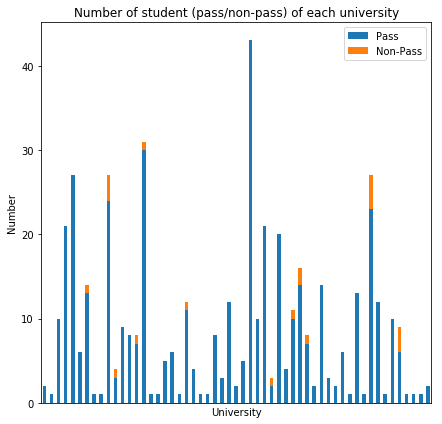

In [4]:
df2 = df.groupby(['出身大学', 'このESはES選考を通過しましたか'])['出身大学'].count().unstack('このESはES選考を通過しましたか').fillna(0)
ax = df2[['はい','いいえ']].plot(kind='bar', stacked=True,figsize=(7,7))
ax.legend(["Pass", "Non-Pass"]);
plt.title("Number of student (pass/non-pass) of each university")
plt.xlabel("University")
plt.ylabel("Number")
plt.xticks([]);

**Conclusion: Because in each university "non-pass" student come from, there are many others "pass" -> What university employees come from does not related to the ES result.** 

### 1.2.2 Check if Department of employees affect to the ES result

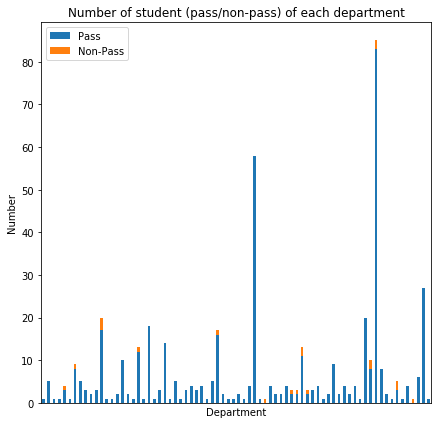

In [5]:
df3 = df.groupby(['学部', 'このESはES選考を通過しましたか'])['学部'].count().unstack('このESはES選考を通過しましたか').fillna(0)
ax = df3[['はい','いいえ']].plot(kind='bar', stacked=True, figsize=(7,7))
ax.legend(["Pass", "Non-Pass"]);
plt.title("Number of student (pass/non-pass) of each department")
plt.xlabel("Department")
plt.ylabel("Number")
plt.xticks([]);

**Conclusion: The same as university, what department employee comefrom does not affect to ES result**

###  1.2.3 Check if 'desired degree' affect to the ES result 

For はい(Yes):
Mean value degree of desire: 4.669603524229075 -

For いいえ(No):
Mean value degree of desire: 3.45 -



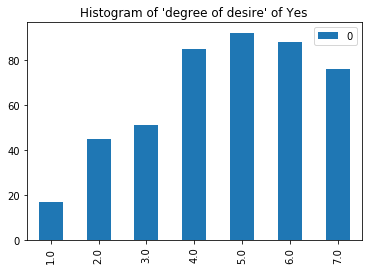

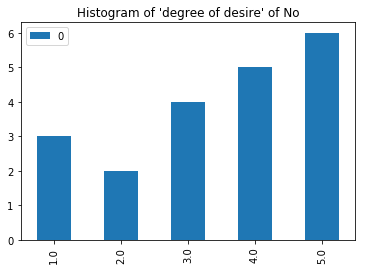

In [7]:
# Pass and non-pass groups  
import numpy as np
df_es_result_groups = df.groupby(['このESはES選考を通過しましたか'])
es_result_groups = df_es_result_groups.groups
group_names = ['はい','いいえ']
for name in group_names:
    group = df_es_result_groups.get_group(name)
    degrees = list(group['ESを提出した時のこの企業への志望度を教えてください'])
    letter_counts = Counter(degrees)
    mean = np.mean(list(degrees))
    print("For {}({}):\nMean value degree of desire: {} -\n".format(name, Translator().translate(str(name)).text, mean))
    
    df1 = pd.DataFrame.from_dict(letter_counts, orient='index')
    df1.plot(kind='bar')
    plt.title("Histogram of 'degree of desire' of {}".format(Translator().translate(str(name)).text))
   

**Conclusion: Degree of desire may be a factor that affect to the result of ES. This degree can be achieve by analyzing the question/answer pairs**

# 2. Analyze the Final Result

## 2.1  Final Result

秋・冬のインターン(Autumn / Winter Intern):
Most Result are: インターン通過 --> Pass through intern

夏のインターン(Summer intern):
Most Result are: インターン通過 --> Pass through intern

本選考(This selection):
Most Result are: 内定 --> Tentative decision



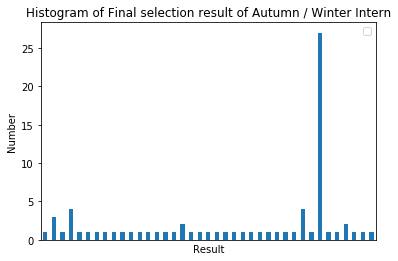

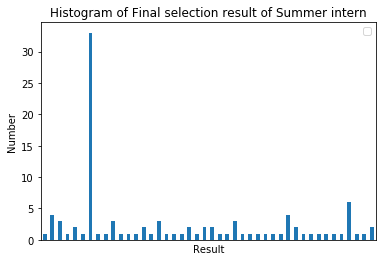

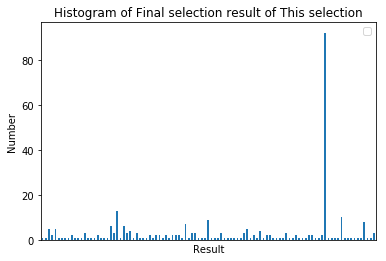

In [12]:
df_interviewee_groups = df.groupby(['いつの選考ですか'])
interviewee_groups = df_interviewee_groups.groups
group_names = interviewee_groups.keys()
for name in group_names:
    group = df_interviewee_groups.get_group(name)
    final_result = list(group['この企業の最終的な選考結果を教えてください'])

    letter_counts = Counter(final_result)
   
    value_most, count_most = letter_counts.most_common(1)[0]
    print("{}({}):\nMost Result are: {} --> {}\n".format(name, Translator().translate(name).text,
                                                     value_most, Translator().translate(str(value_most)).text))
    df1 = pd.DataFrame.from_dict(letter_counts, orient='index')
    ax = df1.plot(kind='bar')
    plt.title("Histogram of Final selection result of {}".format(Translator().translate(name).text))
    plt.xticks([])
    plt.xlabel("Result")
    plt.ylabel("Number")
    ax.legend([])


**Conclusion: Most the employee accepted through intern. When it come to full-time interview, most result are Tentative decision
**